<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
<center>
Авторы материала: Ольга Дайховская (@aiho), Юрий Кашницкий (@yorko). 
    
Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание № 7 (демо)
## <center> Обучение без учителя: метод главных компонент и кластеризация

В этом задании мы разберемся с тем, как работают методы снижения размерности и кластеризации данных. Заодно еще раз попрактикуемся в задаче классификации.

Мы будем работать с набором данных [Samsung Human Activity Recognition](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones). Скачайте данные [отсюда](https://drive.google.com/file/d/14RukQ0ylM2GCdViUHBBjZ2imCaYcjlux/view?usp=sharing). Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S3 (подробнее про признаки – по ссылке на UCI выше), также известен вид активности человека с телефоном в кармане – ходил ли он, стоял, лежал, сидел или шел вверх/вниз по лестнице. 

Вначале мы представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей чисто на основе имеющихся признаков. Затем решим задачу определения вида физической активности именно как задачу классификации. 

Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1qzcrfsNFy-e4TW59v2fqMj_OTom2SIOxtq4MWlI92p0).

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

In [5]:
X_train = np.loadtxt("C:/Users/user/Documents/Lapteva/USML/samsung_HAR/samsung_train.txt")
y_train = np.loadtxt("C:/Users/user/Documents/Lapteva/USML/samsung_HAR/samsung_train_labels.txt").astype(int)

X_test = np.loadtxt("C:/Users/user/Documents/Lapteva/USML/samsung_HAR/samsung_test.txt")
y_test = np.loadtxt("C:/Users/user/Documents/Lapteva/USML/samsung_HAR/samsung_test_labels.txt").astype(int)

In [6]:
# Проверим размерности
assert(X_train.shape == (7352, 561) and y_train.shape == (7352,))
assert(X_test.shape == (2947, 561) and y_test.shape == (2947,))

Для кластеризации нам не нужен вектор ответов, поэтому будем работать с объединением обучающей и тестовой выборок. Объедините *X_train* с *X_test*, а *y_train* – с *y_test*. 

In [10]:
# Ваш код здесь
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

Определим число уникальных значений меток целевого класса.

In [11]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

In [12]:
n_classes = np.unique(y).size

[Эти метки соответствуют:](https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names)
- 1 - ходьбе
- 2 - подъему вверх по лестнице
- 3 - спуску по лестнице
- 4 - сидению
- 5 - стоянию
- 6 - лежанию

*уж простите, если звучание этих существительных кажется корявым :)*

Отмасштабируйте выборку с помощью `StandardScaler` с параметрами по умолчанию.

In [13]:
# Ваш код здесь
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

Понижаем размерность с помощью PCA, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных. Используйте отмасштабированную выборку и зафиксируйте random_state (константа RANDOM_STATE).

In [16]:
# Ваш код здесь

pca = PCA(n_components=56, random_state= RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)

(pca.explained_variance_ratio_).sum()

0.8835860057077849

In [17]:
pca = PCA(n_components=65, random_state= RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)

(pca.explained_variance_ratio_).sum()

0.899784038939901

In [18]:
pca = PCA(n_components=66, random_state= RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)

(pca.explained_variance_ratio_).sum()

0.9015056286454431

In [19]:
pca = PCA(n_components=193, random_state= RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)

(pca.explained_variance_ratio_).sum()

0.9922030279719032

In [20]:
pca = PCA(n_components=66, random_state= RANDOM_STATE).fit(X_scaled)
X_pca = pca.transform(X_scaled)

pca.explained_variance_ratio_

array([0.50738221, 0.06239186, 0.02692564, 0.02452871, 0.01888936,
       0.01631395, 0.01414533, 0.01216211, 0.00985248, 0.00949228,
       0.00858304, 0.0080998 , 0.00765862, 0.00676667, 0.0063024 ,
       0.00615717, 0.00595334, 0.00577193, 0.0056343 , 0.00540827,
       0.00518823, 0.00502739, 0.0047322 , 0.00463807, 0.00446834,
       0.00439856, 0.00416849, 0.00400753, 0.00389007, 0.00381285,
       0.00366818, 0.00364243, 0.00349103, 0.00346642, 0.00335491,
       0.00329351, 0.00323766, 0.00300372, 0.00293956, 0.00290223,
       0.00275389, 0.0026924 , 0.00263588, 0.00257685, 0.00254883,
       0.00246243, 0.00244097, 0.00237034, 0.0023478 , 0.00230484,
       0.00226826, 0.00217151, 0.0021133 , 0.00205235, 0.00200965,
       0.00200008, 0.00193958, 0.00191819, 0.00190165, 0.00187247,
       0.00180231, 0.00178205, 0.00175374, 0.00171551, 0.00167247,
       0.00164747])

**Вопрос 1:**<br>
Какое минимальное число главных компонент нужно выделить, чтобы объяснить 90% дисперсии исходных (отмасштабированных) данных?

**Варианты:**
- 56 
- 65
- 66 VV
- 193

**Вопрос 2:**<br>
Сколько процентов дисперсии приходится на первую главную компоненту? Округлите до целых процентов. 

**Варианты:**
- 45
- 51 VVV
- 56
- 61

In [4]:
# Ваш код здесь

Визуализируйте данные в проекции на первые две главные компоненты.

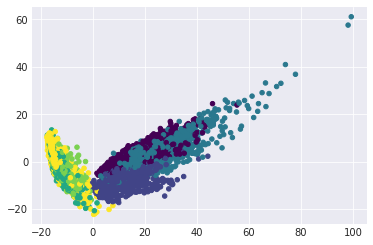

In [30]:
# Ваш код здесь
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, cmap='viridis');

**Вопрос 3:**<br>
Если все получилось правильно, Вы увидите сколько-то кластеров, почти идеально отделенных друг от друга. Какие виды активности входят в эти кластеры?<br>

**Ответ:**
- 1 кластер: все 6 активностей
- 2 кластера: (ходьба, подъем вверх по лестнице, спуск по лестнице) и (сидение, стояние, лежание) VVV
- 3 кластера: (ходьба), (подъем вверх по лестнице, спуск по лестнице) и (сидение, стояние, лежание)
- 6 кластеров

------------------------------

Сделайте кластеризацию данных методом `KMeans`, обучив модель на данных со сниженной за счет PCA размерностью. В данном случае мы подскажем, что нужно искать именно 6 кластеров, но в общем случае мы не будем знать, сколько кластеров надо искать.

Параметры:

- **n_clusters** = n_classes (число уникальных меток целевого класса)
- **n_init** = 100
- **random_state** = RANDOM_STATE (для воспроизводимости результата)

Остальные параметры со значениями по умолчанию.

In [32]:
# Ваш код здесь
km = KMeans(n_clusters=n_classes, 
            n_init = 100, 
            random_state = RANDOM_STATE).fit(X_pca)
cluster_labels = km.predict(X_pca)

Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

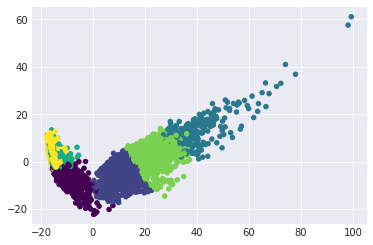

In [33]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=cluster_labels, s=20,  cmap='viridis');

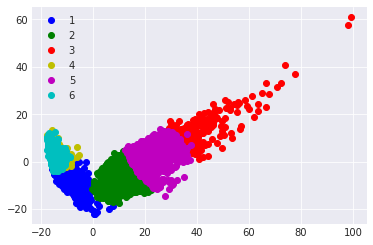

In [34]:
# Ваш код здесь

km_cluster = cluster_labels
plt.plot(X_pca[km_cluster == 0, 0], X_pca[km_cluster == 0, 1], 'bo', label='1')
plt.plot(X_pca[km_cluster == 1, 0], X_pca[km_cluster == 1, 1], 'go', label='2')
plt.plot(X_pca[km_cluster == 2, 0], X_pca[km_cluster == 2, 1], 'ro', label='3')
plt.plot(X_pca[km_cluster == 3, 0], X_pca[km_cluster == 3, 1], 'yo', label='4')
plt.plot(X_pca[km_cluster == 4, 0], X_pca[km_cluster == 4, 1], 'mo', label='5')
plt.plot(X_pca[km_cluster == 5, 0], X_pca[km_cluster == 5, 1], 'co', label='6')
plt.legend(loc=0);

Посмотрите на соответствие между метками кластеров и исходными метками классов и на то, какие виды активностей алгоритм `KMeans` путает.

In [38]:
tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 
             'спуск по лестнице', 'сидение', 'стояние', 'лежание', 'все']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['все']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,все
ходьба,0,904,78,0,740,0,1722
подъем вверх по лестнице,2,1241,5,0,296,0,1544
спуск по лестнице,0,320,196,0,890,0,1406
сидение,450,1,0,1234,0,92,1777
стояние,562,0,0,1344,0,0,1906
лежание,329,5,0,52,0,1558,1944
все,1343,2471,279,2630,1926,1650,10299


Видим, что каждому классу (т.е. каждой активности) соответствуют несколько кластеров. Давайте посмотрим на максимальную долю объектов в классе, отнесенных к какому-то одному кластеру. Это будет простой метрикой, характеризующей, насколько легко класс отделяется от других при кластеризации. 

Пример: если для класса "спуск по лестнице", в котором 1406 объектов,  распределение кластеров такое:
 - кластер 1 – 900
 - кластер 3 – 500
 - кластер 6 – 6,
 
то такая доля будет 900 / 1406 $\approx$ 0.64.
 

**Вопрос 4:**<br>
Какой вид активности отделился от остальных лучше всего в терминах простой  метрики, описанной выше?<br>

-подъем вверх по лестнице


**Ответ:**
- ходьба
- стояние
- спуск по лестнице
- перечисленные варианты не подходят

In [43]:
(904) / 1722 , 1241 / 1544, 890 / 1406, 1234 / 1777, 1344/1906, 1558/1944


(0.5249709639953543,
 0.8037564766839378,
 0.6330014224751067,
 0.6944288126055149,
 0.7051416579223505,
 0.801440329218107)

Видно, что kMeans не очень хорошо отличает только активности друг от друга. Используйте метод локтя, чтобы выбрать оптимальное количество кластеров. Параметры алгоритма и данные используем те же, что раньше, меняем только `n_clusters`.

In [47]:
inertia = []
for k in range(1, n_classes + 1):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_scaled)
    inertia.append(np.sqrt(kmeans.inertia_))


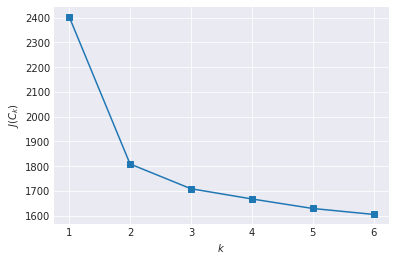

In [48]:

plt.plot(range(1,  n_classes + 1), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

**Вопрос 5:**<br>
Какое количество кластеров оптимально выбрать, согласно методу локтя?<br>

**Ответ:**
- 1
- 2 VV
- 3
- 4

------------------------

Попробуем еще один метод кластеризации, который описывался в статье – агломеративную кластеризацию.

In [49]:
ag = AgglomerativeClustering(n_clusters=n_classes, 
                             linkage='ward').fit(X_pca)

In [53]:
ag_pred = ag.fit_predict(X_pca)

In [54]:
ag_pred

array([2, 5, 5, ..., 0, 0, 0], dtype=int64)

Посчитайте Adjusted Rand Index (`sklearn.metrics`) для получившегося разбиения на кластеры и для `KMeans` с параметрами из задания к 4 вопросу.

In [57]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(ag_pred, y)


0.49284557887865715

In [58]:
adjusted_rand_score(cluster_labels, y)

0.4197013735890295

**Вопрос 6:**<br>
Отметьте все верные утверждения.<br>

**Варианты:**
- V Согласно ARI, KMeans справился с кластеризацией хуже, чем Agglomerative Clustering
- V Для ARI не имеет значения какие именно метки присвоены кластерам, имеет значение только разбиение объектов на кластеры
- V В случае случайного разбиения на кластеры ARI будет близок к нулю

-------------------------------

Можно заметить, что задача не очень хорошо решается именно как задача кластеризации, если выделять несколько кластеров (> 2). Давайте теперь решим задачу классификации, вспомнив, что данные у нас размечены.  

Для классификации используйте метод опорных векторов – класс `sklearn.svm.LinearSVC`. Мы в курсе отдельно не рассматривали этот алгоритм, но он очень известен, почитать про него можно, например, в материалах Евгения Соколова –  [тут](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem11_linear.pdf). 

Настройте для `LinearSVC` гиперпараметр `C` с помощью `GridSearchCV`. 

- Обучите новый `StandardScaler` на обучающей выборке (со всеми исходными признаками), прмиените масштабирование к тестовой выборке
- В `GridSearchCV` укажите  cv=3.

In [59]:
# Ваш код здесь

scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
svc = LinearSVC(random_state=RANDOM_STATE)
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [63]:
# Ваш код здесь
best_svc = GridSearchCV(
    estimator=svc,
    param_grid=svc_params,
    cv=3
)

In [76]:
# Ваш код здесь
best_svc_0 = best_svc.fit(X_train_scaled, y_train)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\s

In [77]:
best_svc.best_params_

{'C': 0.1}

In [78]:
best_svc.best_score_

0.9382480957562568

**Вопрос 7**<br>
Какое значение гиперпараметра `C` было выбрано лучшим по итогам кросс-валидации?<br>

**Ответ:**
- 0.001
- 0.01
- 0.1 v
- 1
- 10

In [69]:
y_predicted = best_svc.predict(X_test_scaled)

In [71]:
tab = pd.crosstab(y_test, y_predicted, margins=True)
tab.index = ['ходьба', 'подъем вверх по лестнице', 'спуск по лестнице', 
             'сидение', 'стояние', 'лежание', 'все']
tab.columns = tab.index
tab

,ходьба,подъем вверх по лестнице,спуск по лестнице,сидение,стояние,лежание,все
ходьба,494,2,0,0,0,0,496
подъем вверх по лестнице,12,459,0,0,0,0,471
спуск по лестнице,2,4,412,1,1,0,420
сидение,0,4,0,427,60,0,491
стояние,0,0,0,15,517,0,532
лежание,0,0,0,0,11,526,537
все,508,469,412,443,589,526,2947


**Вопрос 8:**<br>
Какой вид активности SVM определяет хуже всего в терминах точности? Полноты? <br>

**Ответ:**
- по точности – подъем вверх по лестнице, по полноте – лежание
- по точности – лежание, по полноте – сидение
- по точности – ходьба, по полноте – ходьба
- по точности – стояние, по полноте – сидение V

Наконец, проделайте то же самое, что в 7 вопросе, только добавив PCA.

- Используйте выборки `X_train_scaled` и `X_test_scaled`
- Обучите тот же PCA, что раньше, на отмасшабированной обучающей выборке, примените преобразование к тестовой
- Настройте гиперпараметр `C` на кросс-валидации по обучающей выборке с PCA-преобразованием. Вы заметите, насколько это проходит быстрее, чем раньше.

**Вопрос 9:**<br>
Какова разность между лучшим качеством (долей верных ответов) на кросс-валидации в случае всех 561 исходных признаков и во втором случае, когда применялся метод главных компонент? Округлите до целых процентов.<br>

**Варианты:**
- Качество одинаковое
- 2%
- 4% V
- 10%
- 20%


In [72]:
pca = PCA(n_components=66, random_state= RANDOM_STATE).fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [73]:
best_svc1 = best_svc.fit(X_train_pca, y_train)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\s

In [75]:
best_svc1.best_score_

0.9007072905331882

**Вопрос 10:**<br>
Выберите все верные утверждения:

**Варианты:**
- Метод главных компонент в данном случае позволил уменьшить время обучения модели, при этом качество (доля верных ответов на кросс-валидации) очень пострадало, более чем на 10%
- PCA можно использовать для визуализации данных, однако для этой задачи есть и лучше подходящие методы, например, tSNE. Зато PCA имеет меньшую вычислительную сложность V
- PCA строит линейные комбинации исходных признаков, и в некоторых задачах они могут плохо интерпретироваться человеком V